# Team Members
## 1. Dharmanshu Singh(210398)


# Project Details :
#### For many videos, the main content of the videos is only 50-60% of the total length.

#### Youtube summarizer will summarize the content of the video by keeping all the important points and making it short and easily understandable.

#### In this case we are not just using transcript for summarization but converting actual audio to text and then use it for summarization which allows us to quickly look out for the important patterns in the video and helps us to save time and efforts to go through the whole content of the video.

In [47]:
#connecting to gpu in terminal
#password-Dharmanshu##24
#ssh dharmanshu.singh.21cse@10.1.1.18
#conda activate myenv
#jupyter notebook --no-browser --port=8889
#in new terminal
#ssh -N -L localhost:8889:localhost:8889 dharmanshu.singh.21cse@10.1.1.18
#Roberta large model 


In [48]:
#for self attention mechanism-importance of different words
pip install -q transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [49]:
#for transcript of the youtube video
pip install -q youtube_transcript_api

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [50]:
# importing libraries
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

# Extracting Video ID from URL

In [51]:
from IPython.display import YouTubeVideo

In [52]:
video=input("Enter the link of your YouTube Video: ")

In [53]:
vid_id = video.split("=")[1]
vid_id

'Gtm5gVsYiHE'

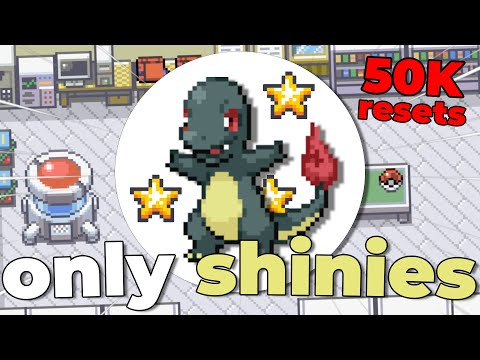

In [54]:
YouTubeVideo(vid_id)

# Getting Video Transcript

In [55]:
transcript = YouTubeTranscriptApi.get_transcript(vid_id)
transcript

[{'text': 'in Generation 3 the odds of encountering',
  'start': 0.04,
  'duration': 4.52},
 {'text': 'a shiny Pokémon are 1 in', 'start': 1.76, 'duration': 5.28},
 {'text': '8,192 in the new generations of Pokémon',
  'start': 4.56,
  'duration': 3.959},
 {'text': 'you have access to something called a',
  'start': 7.04,
  'duration': 3.479},
 {'text': 'shiny charm which increases the odds of',
  'start': 8.519,
  'duration': 3.801},
 {'text': 'you actually being able to encounter a',
  'start': 10.519,
  'duration': 3.361},
 {'text': 'shiny Pokémon but you guys are', 'start': 12.32, 'duration': 3.68},
 {'text': 'Generation 3 Fanatics and love the watch',
  'start': 13.88,
  'duration': 3.92},
 {'text': 'me hunt for shinies in a game that do',
  'start': 16.0,
  'duration': 4.24},
 {'text': 'not offer anything to boost my odds',
  'start': 17.8,
  'duration': 3.96},
 {'text': 'without the conveniences of the Medusa',
  'start': 20.24,
  'duration': 3.44},
 {'text': 'method or a shiny 

In [56]:
# iterating throughout and adding all text together
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

25951


In [57]:
result

" in Generation 3 the odds of encountering a shiny Pokémon are 1 in 8,192 in the new generations of Pokémon you have access to something called a shiny charm which increases the odds of you actually being able to encounter a shiny Pokémon but you guys are Generation 3 Fanatics and love the watch me hunt for shinies in a game that do not offer anything to boost my odds without the conveniences of the Medusa method or a shiny charm all of this is going to come down to patience a lot of patience welcome to my third and final Pokémon fire red/ leaf G shiny only video probably the rules for this one are pretty simple I need to have a full team of six shiny Pokémon before entering the Elite 4 every Pokemon must be shiny obviously that means no non- shiny hm users I can't use any items in battle and I must play on set mode these videos take a very long time to make so if you guys do want to see more like this make sure to subscribe and without any further Ado let's get into it here we are onc

# Model Building

## 1. Facebook Bart Large CNN Model

In [58]:
summarizerfb = pipeline("summarization", model="facebook/bart-large-cnn")

In [59]:
# iterating in batches since max token length for Bart models is 1024, so we divide each batch here into token lengths of <1000
num_iters = int(len(result)/1000)

# summarizing on each batch and appending to final summary
summarized_text = []
summarized_text2 = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("\n")
  print("input text \n" + result[start:end])
  out = summarizerfb(result[start:end], max_length=130, min_length=30, do_sample=False)
  out = out[0]
  print("\n")
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)
  summarized_text2 = ' '.join(summarized_text)



input text 
 in Generation 3 the odds of encountering a shiny Pokémon are 1 in 8,192 in the new generations of Pokémon you have access to something called a shiny charm which increases the odds of you actually being able to encounter a shiny Pokémon but you guys are Generation 3 Fanatics and love the watch me hunt for shinies in a game that do not offer anything to boost my odds without the conveniences of the Medusa method or a shiny charm all of this is going to come down to patience a lot of patience welcome to my third and final Pokémon fire red/ leaf G shiny only video probably the rules for this one are pretty simple I need to have a full team of six shiny Pokémon before entering the Elite 4 every Pokemon must be shiny obviously that means no non- shiny hm users I can't use any items in battle and I must play on set mode these videos take a very long time to make so if you guys do want to see more like this make sure to subscribe and without any further Ado let's get into it he

In [60]:
len(str(summarized_text2))

7856

In [61]:
str(summarized_text2)

'In Generation 3 the odds of encountering a shiny Pokémon are 1 in 8,192 in the new generations of Pokémon you have access to something called a shiny charm which increases the odds. I need to have a full team of six shiny Pokémon before entering the Elite 4 every Pokemon must be shiny. Charmander is going to be a lot worse at early game compared to Squirtle and Bulbasaur resetting for Charmander was a very annoying task. After many many hours and almost 177,000 resets I end up getting my shiny charmander Charmander does look pretty cool but we all know its final evolution looks a lot cooler. Charmander evolved into Charmeleon which follows the same exact color scheme as Charmander did after defeating a super nerd in Mal Moon. I have to pick a fossil and I end up choosing the Helix Fossil. It has also occurred to me that I\'m not going to beat Misty with a charmeleon. Using this method I\'m able to encounter more Pokémon per hour compared to resetting for my starter. This is mainly bec

In [62]:
#evaluating model
import sys
from rouge import Rouge

sys.setrecursionlimit(10**6)  

def evaluate_summary(reference_summary, summarized_text):
    rouge = Rouge()
    scores = rouge.get_scores(summarized_text, reference_summary)
    return scores

result 
summarized_text2 

scores = evaluate_summary(result, summarized_text2)
print("ROUGE Scores:")

#rouge-1: This evaluates overlap of unigrams (single words) between the reference summary and the summarized text.
#rouge-2: This evaluates overlap of bigrams (pairs of consecutive words) between the reference summary and the summarized text.
#rouge-l: This evaluates the longest common subsequence between the reference summary and the summarized text, considering the words as well as the structure of the sentences.

for metric, values in scores[0].items():
    print(f"{metric.upper()}:")
    print(f"  Recall: {values['r']*100:.2f}%")
    print(f"  Precision: {values['p']*100:.2f}%")
    print(f"  F1-score: {values['f']*100:.2f}%")
    print()


ROUGE Scores:
ROUGE-1:
  Recall: 49.63%
  Precision: 93.37%
  F1-score: 64.81%

ROUGE-2:
  Recall: 32.93%
  Precision: 89.75%
  F1-score: 48.18%

ROUGE-L:
  Recall: 48.79%
  Precision: 91.80%
  F1-score: 63.72%



In [63]:
# Calculate accuracy using F1-score
f1_score = scores[0]['rouge-1']['f']
accuracy = f1_score * 100 

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 64.81%


# T5-Base Model

In [64]:
# defining the model from Hugging Face Transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [73]:
num_iters = int(len(result)/512)
summarized_text = []

for i in range(0, num_iters + 1):
    start = i * 1000
    end = (i + 1) * 1000
    
    print("\n")
    print("Input text:\n" + result[start:end])
    
    inp = tokenizer("summarize: " + result[start:end], return_tensors="pt", max_length=512, truncation=True)
    out = model.generate(inp["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    output = tokenizer.decode(out[0])
    
    # Remove <pad> tokens
    output = output.replace("<pad>", "").strip()
    
    # Remove </s> token
    output = output.replace("</s>", "").strip()
    
    summarized_text.append(output)
    
    print("\n")
    print("Summarized text:\n" + output)




Input text:
 in Generation 3 the odds of encountering a shiny Pokémon are 1 in 8,192 in the new generations of Pokémon you have access to something called a shiny charm which increases the odds of you actually being able to encounter a shiny Pokémon but you guys are Generation 3 Fanatics and love the watch me hunt for shinies in a game that do not offer anything to boost my odds without the conveniences of the Medusa method or a shiny charm all of this is going to come down to patience a lot of patience welcome to my third and final Pokémon fire red/ leaf G shiny only video probably the rules for this one are pretty simple I need to have a full team of six shiny Pokémon before entering the Elite 4 every Pokemon must be shiny obviously that means no non- shiny hm users I can't use any items in battle and I must play on set mode these videos take a very long time to make so if you guys do want to see more like this make sure to subscribe and without any further Ado let's get into it he

In [74]:
len(' '.join(summarized_text))

10358

In [75]:
summarized_text

['in Generation 3 the odds of encountering a shiny Pokémon are 1 in 8,192. in the new generations of Pokémon you have access to something called a shiny charm which increases the odds of you actually encountering a shiny Pokémon. this is my third and final Pokémon fire red/ leaf G shiny only video. if you guys do want to see more like this make sure to subscribe.',
 "in Pokémon Fire Red last time I did this I chose bubbl sore and the time before I chose Bulbasaur so this time it's time for Charmander the downside to this is that Charmander is going to be a lot worse at early game compared to Squirtle and Bulbasaur resetting for Charmander was a very annoying task. after many many many hours and almost 177,000 resets I end up getting my shiny charmander.",
 'at level 14 i do know metal claw but the Onyx was just not having any of it so the only way i was able to win was the just Brute Force reset on this battle until i get the best possible RNG. after showing off our insane skill we get

In [79]:
import sys
from rouge import Rouge

sys.setrecursionlimit(10**6)  

def evaluate_summary(reference_summary, summarized_text):
    rouge = Rouge()
    scores = rouge.get_scores(summarized_text, reference_summary)
    return scores

result
summarized_text 

if not isinstance(result, str):
    reference_summary = str(result)
if not isinstance(summarized_text, str):
    summarized_text = str(summarized_text)

scores = evaluate_summary(result, summarized_text)
print("ROUGE Scores:")

# rouge-1: This evaluates overlap of unigrams (single words) between the reference summary and the summarized text.
# rouge-2: This evaluates overlap of bigrams (pairs of consecutive words) between the reference summary and the summarized text.
# rouge-l: This evaluates the longest common subsequence between the reference summary and the summarized text, considering the words as well as the structure of the sentences.

for metric, values in scores[0].items():
    print(f"{metric.upper()}:")
    print(f"  Recall: {values['r']*100:.2f}%")
    print(f"  Precision: {values['p']*100:.2f}%")
    print(f"  F1-score: {values['f']*100:.2f}%")
    print()


ROUGE Scores:
ROUGE-1:
  Recall: 46.57%
  Precision: 92.11%
  F1-score: 61.86%

ROUGE-2:
  Recall: 28.31%
  Precision: 84.74%
  F1-score: 42.44%

ROUGE-L:
  Recall: 46.47%
  Precision: 91.93%
  F1-score: 61.74%

